In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:

!pip install scikit-learn
!pip install matplotlib
!pip install seaborn


Loading data...
Found 1061 files belonging to 3 classes.
Using 849 files for training.
Found 1061 files belonging to 3 classes.
Using 212 files for validation.
Classes found: ['MEDIUM', 'NORMAL', 'SEVIOUR']
Number of training batches: 27
Number of validation batches: 4
Number of test batches: 3


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,371 (90.98 MB)

 Trainable params: 262,659 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)


Starting model training...
Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 241s 7s/step - accuracy: 0.3498 - loss: 1.2443 - val_accuracy: 0.4483 - val_loss: 1.0541
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 162s 6s/step - accuracy: 0.3640 - loss: 1.1756 - val_accuracy: 0.4483 - val_loss: 1.0483
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 170s 6s/step - accuracy: 0.3969 - loss: 1.1217 - val_accuracy: 0.4483 - val_loss: 1.0389
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 158s 6s/step - accuracy: 0.4299 - loss: 1.0819 - val_accuracy: 0.4569 - val_loss: 1.0266
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 149s 6s/step - accuracy: 0.4299 - loss: 1.0660 - val_accuracy: 0.4741 - val_loss: 1.0212
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 121s 4s/step - accuracy: 0.4028 - loss: 1.0628 - val_accuracy: 0.5172 - val_loss: 1.0062
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - accuracy: 0.4476 - loss: 1.0552 - val_accuracy: 0.5690 - val_loss: 0.9988
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.4370 - loss: 1.0442

c:\Users\Ajay\anaconda3\JUPYTER\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ajay\anaconda3\JUPYTER\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ajay\anaconda3\JUPYTER\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


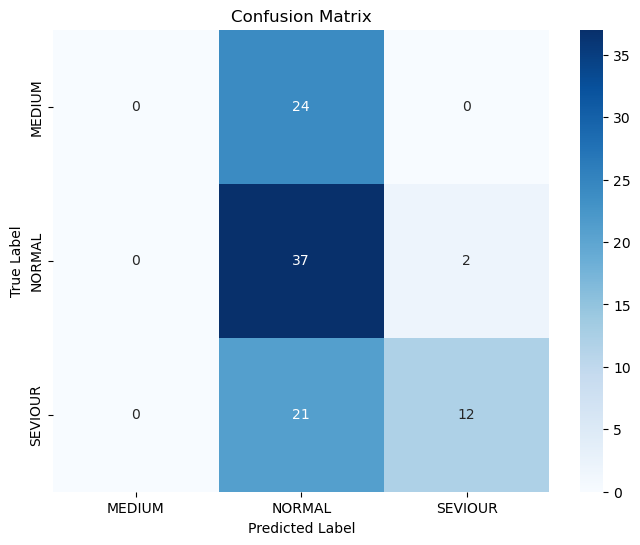

In [ ]:
# --- Installation Instructions for VS Code Terminal ---
# You can copy and paste the following commands into your VS Code terminal
# to install the necessary libraries for this script to run.
#
# !pip install tensorflow
# !pip install scikit-learn
# !pip install matplotlib
# !pip install seaborn
#
# The other required libraries (os, numpy) are part of Python's standard library.
# The pandas library is not used in this script, so it is not included here.

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# --- Step 1: Data Loading and Preprocessing ---
# Define paths and parameters
data_dir = 'D:/SIHDATASET'
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Check if the data directory exists
if not os.path.exists(data_dir):
    print(f"Error: The directory '{data_dir}' does not exist.")
    print("Please check the path and make sure it points to your dataset.")
    exit()

# Load the datasets, splitting them into training and validation sets.
# The `image_dataset_from_directory` utility infers the labels from the folder names.
# Note: The directory for "severe" is named "SEVIOUR" as per the user's prompt.
try:
    print("Loading data...")
    train_ds = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE)

    val_ds = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE)
    
    # Manually split the validation dataset to create a test set (10% of total data).
    # This is a common practice when image_dataset_from_directory only provides a train/validation split.
    val_batches = tf.data.experimental.cardinality(val_ds)
    test_ds = val_ds.take(val_batches // 2)
    val_ds = val_ds.skip(val_batches // 2)

    class_names = sorted(train_ds.class_names) # Sort to ensure consistent mapping
    print(f"Classes found: {class_names}")
    
    # Define the class name to numerical label mapping
    class_mapping = {
        'NORMAL': 0,
        'MEDIUM': 1,
        'SEVIOUR': -1
    }

    print(f"Number of training batches: {tf.data.experimental.cardinality(train_ds)}")
    print(f"Number of validation batches: {tf.data.experimental.cardinality(val_ds)}")
    print(f"Number of test batches: {tf.data.experimental.cardinality(test_ds)}")

except Exception as e:
    print(f"An unexpected error occurred during data loading: {e}")
    exit()

# Create data augmentation layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
    ],
    name="data_augmentation",
)

# Normalize pixel values and apply data augmentation
def preprocess(image, label):
    # Normalize pixel values from [0, 255] to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

def augment_and_preprocess(image, label):
    # Apply augmentation to training data
    image = data_augmentation(image, training=True)
    return preprocess(image, label)

train_ds_processed = train_ds.map(augment_and_preprocess).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds_processed = val_ds.map(preprocess).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds_processed = test_ds.map(preprocess).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# --- Step 2: Model Architecture ---
# Load the pre-trained ResNet50 model
base_model = keras.applications.ResNet50(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze the base model layers to prevent them from being trained
base_model.trainable = False

# Create the classification head
inputs = keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation='softmax')(x)
model = keras.Model(inputs, outputs)

model.summary()

# --- Step 3: Model Compilation (Stage 1) ---
print("\n--- Compiling and Training Stage 1: Initial Training (Frozen Base) ---")
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# --- Step 4: Model Training (Stage 1) ---
print("\nStarting Stage 1 training...")

# Define callbacks for early stopping and model saving
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_paddy_model.keras', monitor='val_loss', save_best_only=True)

epochs = 15 # Train the head for a few epochs
history = model.fit(
    train_ds_processed,
    validation_data=val_ds_processed,
    epochs=epochs,
    callbacks=[early_stopping, model_checkpoint]
)

# --- Step 2.5: Fine-tuning Preparation (Stage 2) ---
print("\n--- Starting Stage 2: Fine-Tuning (Unfreezing layers) ---")
# Unfreeze the last few layers of the base model for fine-tuning
base_model.trainable = True
for layer in base_model.layers:
    if not isinstance(layer, layers.BatchNormalization):
        layer.trainable = False
        
# Unfreeze the last few layers to train them with a low learning rate
for layer in base_model.layers[-50:]:
    if not isinstance(layer, layers.BatchNormalization):
        layer.trainable = True

# --- Step 3.5: Model Compilation (Stage 2) ---
# Re-compile the model with a very low learning rate for fine-tuning
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

model.summary(show_trainable=True)

# --- Step 4.5: Model Training (Stage 2) ---
print("\nStarting Stage 2 fine-tuning...")
fine_tune_epochs = 10
total_epochs = epochs + fine_tune_epochs

history_fine_tune = model.fit(
    train_ds_processed,
    validation_data=val_ds_processed,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    callbacks=[early_stopping, model_checkpoint]
)


# --- Step 5: Model Evaluation ---
print("\nEvaluating model on the test dataset...")
test_loss, test_acc = model.evaluate(test_ds_processed)
print(f'\nTest Accuracy: {test_acc:.4f}')

# Generate predictions and evaluation metrics
y_true = np.concatenate([y for x, y in test_ds_processed], axis=0)
y_pred_probs = model.predict(test_ds_processed)
y_pred_indices = np.argmax(y_pred_probs, axis=1)

# Ensure y_true has the correct class labels based on directory names
y_true_labels = []
for label_index in y_true:
    y_true_labels.append(class_names[label_index])

print("\nClassification Report:")
print(classification_report(y_true, y_pred_indices, target_names=class_names))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_true, y_pred_indices)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# --- Step 6: Prediction Function ---
def predict_image(model, class_names, class_mapping):
    """
    Prompts the user for an image path, loads, preprocesses, and predicts the class.
    """
    image_path = input("Enter the full path to the image: ")

    if image_path.lower() == 'exit':
        return False
        
    if not os.path.exists(image_path):
        print(f"Error: The file '{image_path}' does not exist. Please check the path and try again.")
        return True

    try:
        img = tf.keras.utils.load_img(
            image_path, target_size=(IMG_HEIGHT, IMG_WIDTH)
        )
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)  # Create a batch
        img_array = img_array / 255.0 # Normalize

        predictions = model.predict(img_array)
        predicted_index = np.argmax(predictions[0])
        predicted_class = class_names[predicted_index]
        confidence = np.max(tf.nn.softmax(predictions[0]))

        # Get the numerical label from the updated class mapping
        numerical_label = class_mapping.get(predicted_class, -99) 

        print(f"\nThis image most likely belongs to the '{predicted_class}' class.")
        print(f"Numerical Label: {numerical_label}")
        print(f"Confidence: {100 * confidence:.2f}%")

    except Exception as e:
        print(f"An error occurred during prediction: {e}")
        
    return True

if __name__ == '__main__':
    # Example usage of the prediction function in a loop
    running = True
    while running:
        running = predict_image(model, class_names, class_mapping)